**Topic:**        Challenge Set 7  
**Subject:**      Classification  
**Date:**         10/15/2017  
**Name:**         Laura Howard

### Challenge 1

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('house-votes-84.data.txt', sep=",", header=None)
df.columns = ["party_name", "v01", "v02", "v03", "v04", "v05", "v06", "v07", "v08", "v09", "v10",
              "v11", "v12", "v13", "v14", "v15", "v16"]

In [3]:
df.head()

,party_name,v01,v02,v03,v04,v05,v06,v07,v08,v09,v10,v11,v12,v13,v14,v15,v16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [4]:
df.replace(('y', 'n', '?'), (1, 0, None), inplace=True)

In [5]:
df.head()

,party_name,v01,v02,v03,v04,v05,v06,v07,v08,v09,v10,v11,v12,v13,v14,v15,v16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [6]:
df = df.fillna(df.median())

In [7]:
df.head()

,party_name,v01,v02,v03,v04,v05,v06,v07,v08,v09,v10,v11,v12,v13,v14,v15,v16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


### Challenge 2

In [8]:
from sklearn.cross_validation import train_test_split

/Users/mac/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
selected_col = ["v01", "v02", "v03", "v04", "v05", "v06", "v07", "v08", "v09", "v10",
              "v11", "v12", "v13", "v14", "v15", "v16"]

In [10]:
X = df.loc[:,selected_col]

y = df['party_name']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4444)

### Challenge 3

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression

/Users/mac/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [13]:
params = {
    "n_neighbors": np.arange(1,21,1)
}

knn_model = KNeighborsClassifier()
knn_grid_search = GridSearchCV(knn_model, params, n_jobs=-2, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-2,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [14]:
knn_grid_search.grid_scores_

[mean: 0.93750, std: 0.02994, params: {'n_neighbors': 1},
 mean: 0.93750, std: 0.03169, params: {'n_neighbors': 2},
 mean: 0.92763, std: 0.03201, params: {'n_neighbors': 3},
 mean: 0.92105, std: 0.02803, params: {'n_neighbors': 4},
 mean: 0.92105, std: 0.03487, params: {'n_neighbors': 5},
 mean: 0.92105, std: 0.03638, params: {'n_neighbors': 6},
 mean: 0.92434, std: 0.03950, params: {'n_neighbors': 7},
 mean: 0.92763, std: 0.04810, params: {'n_neighbors': 8},
 mean: 0.92105, std: 0.04056, params: {'n_neighbors': 9},
 mean: 0.91776, std: 0.03423, params: {'n_neighbors': 10},
 mean: 0.91776, std: 0.03866, params: {'n_neighbors': 11},
 mean: 0.91776, std: 0.02914, params: {'n_neighbors': 12},
 mean: 0.92105, std: 0.03782, params: {'n_neighbors': 13},
 mean: 0.92763, std: 0.03199, params: {'n_neighbors': 14},
 mean: 0.92434, std: 0.03198, params: {'n_neighbors': 15},
 mean: 0.92105, std: 0.03163, params: {'n_neighbors': 16},
 mean: 0.92434, std: 0.02646, params: {'n_neighbors': 17},
 mean:

In [15]:
knn_grid_search.best_params_

{'n_neighbors': 1}

In [16]:
knn_model2 = KNeighborsClassifier(n_neighbors=16)
knn_model2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=16, p=2,
           weights='uniform')

In [17]:
test_set_pred = knn_model2.predict(X_test)
accuracy_score(y_test,test_set_pred)

0.92366412213740456

k value of 16 gave the highest accuracy score with manual parameter testing, but gridsearch with cross validation suggests k of 1 as the best model.

### Challenge 4

In [18]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
test_set_pred2 = lr_model.predict(X_test)

In [20]:
# Manually calculating accuracy
accurate_pred = 0
for i,j in zip(test_set_pred2, y_test.values):
    if i == j:
        accurate_pred += 1
print(accurate_pred/len(y_test))

0.9389312977099237


In [21]:
# Checking I calculated correctly...
accuracy_score(y_test,test_set_pred2)

0.93893129770992367

### Challenge 5

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df.party_name.value_counts()

democrat      267
republican    168
Name: party_name, dtype: int64

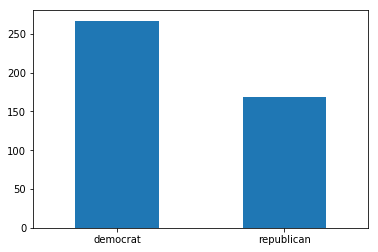

In [24]:
df['party_name'].value_counts().plot(kind='bar')
plt.xticks(rotation=0);

In [25]:
def dem_predictor(X):
    predictions = []
    [predictions.append('democrat') for i in X]
    return(predictions)

In [26]:
input_list = [['democrat', 0, 1, 1], ['republican', 1, 1, 0], ['republican', 1, 1, 0], ['republican', 1, 1, 0]]
dem_predictor(input_list)

['democrat', 'democrat', 'democrat', 'democrat']

In [27]:
actuals = [i for i in y_test]

In [28]:
def accuracy_score(pred,actual):
    accurate_pred = 0
    for i,j in zip(pred, actual):
        if i == j:
            accurate_pred += 1
    print(accurate_pred/len(actual))

In [29]:
accuracy_score(dem_predictor(test_set_pred2),actuals)

0.5877862595419847


In [30]:
def rep_predictor(X):
    predictions = []
    [predictions.append('republican') for i in X]
    return(predictions)

In [31]:
accuracy_score(rep_predictor(test_set_pred2),actuals)

0.4122137404580153


Accuracy for both is equal to the proportion of that label in the data set.

### Challenge 6

In [32]:
k_scores = list([i[1] for i in knn_grid_search.grid_scores_])
all_scores = list(zip(k_scores, ([0.939]*20), ([.588]*20),([.412]*20)))

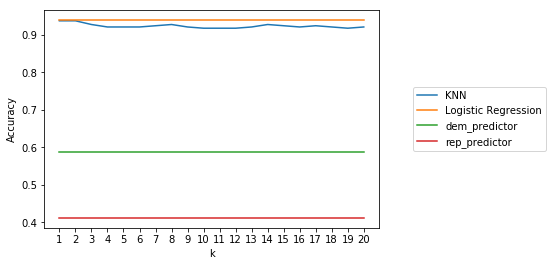

In [33]:
from numpy import array

k = array(range(1,21,1))

for score in zip(*all_scores):
    plt.plot(k, array(score))
plt.xlabel('k')
plt.xticks(range(1,21,1))
plt.ylabel('Accuracy')
plt.legend(['KNN', 'Logistic Regression','dem_predictor', 'rep_predictor'],loc=10, bbox_to_anchor=(1.3, .5));

### Challenge 7

In [34]:
from sklearn.learning_curve import learning_curve

/Users/mac/anaconda/lib/python3.6/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [35]:
train_sizes, train_scores, valid_scores = learning_curve(LogisticRegression(), X, y,)

In [36]:
train_cv_err = np.mean(train_scores, axis=1)
test_cv_err = np.mean(valid_scores, axis=1)

In [37]:
train_sizes

array([ 29,  94, 159, 224, 290])

In [38]:
train_cv_err

array([ 0.97701149,  0.9822695 ,  0.9769392 ,  0.97321429,  0.96896552])

In [39]:
test_cv_err

array([ 0.92643678,  0.92873563,  0.94252874,  0.95632184,  0.96091954])

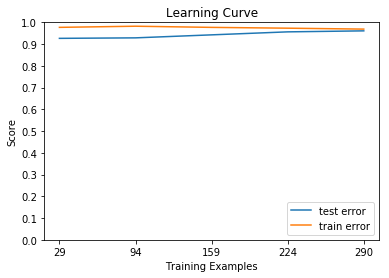

In [40]:
plt.plot(test_cv_err)
plt.plot(train_cv_err)
plt.xticks(np.arange(5), train_sizes)
plt.yticks(np.arange(0,1.1,.1))
plt.ylabel('Score')
plt.xlabel('Training Examples')
plt.title('Learning Curve')
plt.legend(['test error','train error' ], loc='lower right');

### Challenge 8

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [42]:
GNB_model = GaussianNB()
GNB_model.fit(X_train,y_train)

GaussianNB(priors=None)

In [43]:
test_set_pred3 = GNB_model.predict(X_test)
accuracy_score(y_test,test_set_pred3)

0.9389312977099237


In [44]:
SVC_model = SVC()
SVC_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
test_set_pred4 = SVC_model.predict(X_test)
accuracy_score(y_test,test_set_pred4)

0.9541984732824428


In [46]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [47]:
test_set_pred5 = dt_model.predict(X_test)
accuracy_score(y_test,test_set_pred5)

0.9312977099236641


In [48]:
rf_model = RandomForestClassifier(n_estimators = 500)
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [49]:
test_set_pred6 = rf_model.predict(X_test)
accuracy_score(y_test,test_set_pred6)

0.9541984732824428


### Challenge 9

In [50]:
from sklearn.cross_validation import cross_val_score

In [51]:
np.mean(cross_val_score(GaussianNB(), X, y))

0.9264367816091954

In [52]:
np.mean(cross_val_score(SVC(), X, y))

0.95632183908045976

In [53]:
np.mean(cross_val_score(DecisionTreeClassifier(), X, y))

0.93563218390804603

In [54]:
np.mean(cross_val_score(RandomForestClassifier(), X, y))

0.95862068965517233

### Challenge 10

In [55]:
df2 = pd.read_csv('house-votes-84.data.txt', sep=",", header=None)
df2.columns = ["party_name", "v01", "v02", "v03", "v04", "v05", "v06", "v07", "v08", "v09", "v10",
              "v11", "v12", "v13", "v14", "v15", "v16"]

In [56]:
df2.replace(('y', 'n', '?'), (1, 0, None), inplace=True)

In [57]:
df2 = df2.fillna(df2.mode())

In [58]:
selected_col2 = ["v02", "v03", "v04", "v05", "v06", "v07", "v08", "v09", "v10",
              "v11", "v12", "v13", "v14", "v15", "v16"]

In [59]:
X2 = df.loc[:,selected_col2]

y2 = df['v01']

In [60]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=4444)

In [61]:
lr_model2 = LogisticRegression()
lr_model2.fit(X2_train,y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
test_set_pred7 = lr_model2.predict(X2_test)
accuracy_score(y2_test,test_set_pred7)

0.6717557251908397


In [63]:
np.mean(cross_val_score(LogisticRegression(), X2, y2))

0.67561451389982319

### Challenge 11

In [64]:
with open("2013_movies.csv", "r") as f:
    df_movies = pd.DataFrame.from_csv(f)

In [65]:
df_movies.isnull().sum()

Budget                11
DomesticTotalGross     0
Director               4
Rating                 0
Runtime                0
ReleaseDate            0
dtype: int64

In [66]:
df_movies['Budget'].fillna(df_movies.Budget.mean(), inplace=True)

In [67]:
df_movies.head()

,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
Title,,,,,,
The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [68]:
import datetime as dt
import dateutil.parser

df_movies['ReleaseDate'] = df_movies['ReleaseDate'].map(dateutil.parser.parse)
df_movies['ReleaseMonth'] = df_movies['ReleaseDate'].dt.month

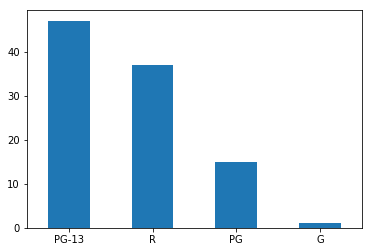

In [69]:
df_movies['Rating'].value_counts().plot(kind='bar')
plt.xticks(rotation=0);

In [70]:
df_movies.head()

,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,ReleaseMonth
Title,,,,,,,
The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22,11
Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03,5
Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,11
Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03,7
Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14,6


In [71]:
selected_col3 = ["Budget", "DomesticTotalGross", "ReleaseMonth", "Runtime"]

In [72]:
X3 = df_movies.loc[:,selected_col3]

y3 = df_movies['Rating']

In [73]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=4444)

In [74]:
lr_model3 = LogisticRegression()
lr_model3.fit(X3_train, y3_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
test_set_pred8 = lr_model3.predict(X3_test)
accuracy_score(y3_test,test_set_pred8)

0.4666666666666667


In [76]:
knn_model3 = KNeighborsClassifier(n_neighbors = 1)
knn_model3.fit(X3_train, y3_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [77]:
test_set_pred9 = knn_model3.predict(X3_test)
accuracy_score(y3_test,test_set_pred9)

0.6


In [78]:
def dumb_predictor(X):
    predictions = []
    [predictions.append('PG-13') for i in X]
    return(predictions)

In [79]:
test = [['PG-13', 1,0,0],['PG',1,0,1],['PG-13',0,0,0]]
dumb_predictor(test)

['PG-13', 'PG-13', 'PG-13']

In [80]:
X3a = np.array(X3)

In [81]:
actuals = [i for i in y3]
accuracy_score(dumb_predictor(X3a),actuals)

0.47


In [82]:
df_movies.Rating.value_counts()

PG-13    47
R        37
PG       15
G         1
Name: Rating, dtype: int64

KNN did a bit better than the baseline, but logistic regression did exactly the same.

In [83]:
lr_model3.coef_

array([[ -8.50264852e-08,   1.97077544e-09,  -1.31773676e-13,
         -1.87685019e-12],
       [ -5.97342871e-09,  -8.80560498e-09,  -6.40989537e-15,
         -9.87494064e-14],
       [  6.56358744e-09,  -3.87137614e-09,  -1.01095286e-15,
         -2.07959364e-14],
       [ -1.39449813e-08,   2.31395492e-09,   4.02863919e-15,
          7.60797631e-14]])

The coeficients are all close to 0 suggesting that there isn't much signal in this data to accurately predict rating

### Challenge 12

In [84]:
df_cancer = pd.read_csv('haberman.data.txt', sep=",", header=None)
df_cancer.columns = ["age", "op_year", "pos_nodes", "5_year_survival"]

In [85]:
df_cancer['5_year_survival'].replace((2), (0), inplace=True)

In [86]:
df_cancer.head()

,age,op_year,pos_nodes,5_year_survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [87]:
df_cancer.isnull().sum()

age                0
op_year            0
pos_nodes          0
5_year_survival    0
dtype: int64

In [88]:
# Average and standard deviation of the age of all patients listed in first column below
df_cancer.describe()

,age,op_year,pos_nodes,5_year_survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [89]:
# Average and standard deviation of the age of those patients that survived 5 or more years after surgery
df_cancer.loc[df_cancer['5_year_survival'] == 1].agg({"age": [np.mean, np.std]})

,age
mean,52.017778
std,11.012154


In [90]:
# # Average and standard deviation of the age of those patients that survived fewer than 5 years after surgery
df_cancer.loc[df_cancer['5_year_survival'] == 0].agg({"age": [np.mean, np.std]})

,age
mean,53.679012
std,10.167137


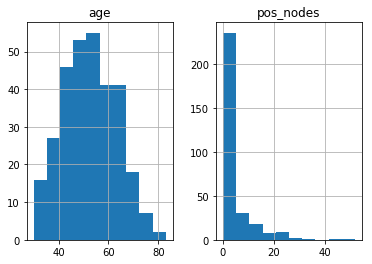

In [91]:
df_cancer.hist(column = ['age', 'pos_nodes']);

In [92]:
# Earliest year of surgery in this dataset
min(df_cancer['op_year'])

58

In [93]:
# Most recent year of surgery in this dataset
max(df_cancer['op_year'])

69

In [94]:
selected_col4 = ["age", "op_year", "pos_nodes"]

In [95]:
X4 = df_cancer.loc[:,selected_col4]

y4 = df_cancer['5_year_survival']

In [96]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=4444)

In [97]:
lr_model4 = LogisticRegression()
lr_model4.fit(X4_train, y4_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [98]:
test_set_pred10 = lr_model4.predict(X4_test)
accuracy_score(y4_test,test_set_pred10)

0.8152173913043478


In [99]:
lr_model4.coef_

array([[-0.0155515 ,  0.02899279, -0.07136197]])

Age and positive nodes are both negatively correlated with survival while operation year is positively correlate.

In [100]:
train_sizes, train_scores, valid_scores = learning_curve(LogisticRegression(), X4, y4,)

In [101]:
train_cv_err = np.mean(train_scores, axis=1)
test_cv_err = np.mean(valid_scores, axis=1)

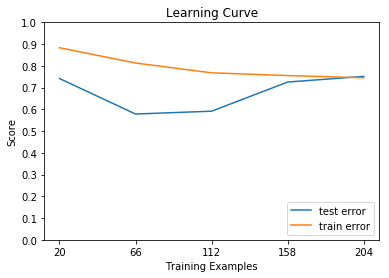

In [102]:
plt.plot(test_cv_err)
plt.plot(train_cv_err)
plt.xticks(np.arange(5), train_sizes)
plt.yticks(np.arange(0,1.1,.1))
plt.ylabel('Score')
plt.xlabel('Training Examples')
plt.title('Learning Curve')
plt.legend(['test error','train error' ], loc='lower right');